In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
# Loading mat files - https://stackoverflow.com/questions/874461/read-mat-files-in-python
file = scipy.io.loadmat("mnist_small.mat")
X = file["X"]
y = file["Y"]
N, D = np.shape(X)

#normalize -> 0 to 1 range
X = X / 255

Vanilla EM

In [26]:
idx = np.random.randint(10000, size = 10000)
X = X[idx]
y = y[idx]
T = 200 # Set iterations here
#K = [5, 10, 15, 20] --- SET K HERE!
K = 20
n = N
X_ = X[:n]
y_ = y[:n]
mu = np.random.rand(K, D)
p = np.ones(K)/K
resp = np.empty([n, K])
var = 1
cll = []
for t in range(T):
    if (t % 10 == 0): print("T is", t)
    # E-Step
    for i in range(n):
        exps = np.linalg.norm(mu - X_[i], axis = 1)**2 / (2*var)
        lognum = np.log(p) - exps
        maxexp = np.max(lognum)
        sum1 = np.sum([np.exp(lognum-maxexp)])
        resp[i] = np.exp(lognum - maxexp  - np.log(sum1))  
    
    # M-Step
    var = 0
    for k in range(K):
        N_k = np.sum(resp[:, k])
        p[k] = N_k / n 
        mu[k] = (X_.T @ resp[:, k]) / N_k
        var += np.linalg.norm(X_ - mu[k], axis=1)**2 @ resp[:, k]
    var = (1/(n*D))*var
    
    # compute cll
    temp = 0
    for k in range(K):
        temp += (resp[:, k] @ (np.log(p[k]) -0.5*np.linalg.norm(X_ - mu[k], axis = 1)**2/var))
        temp -= (D/2)*np.log(var)*np.sum(resp[:,k])
    cll.append(temp)

T is 0
T is 10
T is 20
T is 30
T is 40
T is 50
T is 60
T is 70
T is 80
T is 90
T is 100
T is 110
T is 120
T is 130
T is 140
T is 150
T is 160
T is 170
T is 180
T is 190


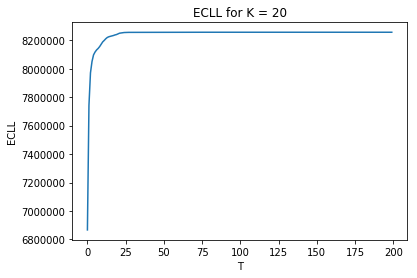

In [27]:
plt.plot(range(T), cll)
plt.title("ECLL for K = %i"%K)
plt.xlabel("T")
plt.ylabel("ECLL")
plt.show()

In [29]:
for k in range(K):
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(mu[k], [28,28]))
    plt.savefig("Kfull" + str(K) + str(k) + ".png")
    plt.close()

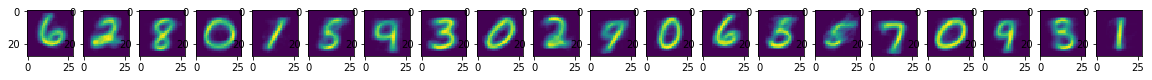

In [28]:
plt.figure(figsize = (K,K))
for k in range(K):
    plt.subplot(K, K, k+1)
    plt.imshow(np.reshape(mu[k], [28,28]))
    #plt.savefig("KO_" + str(K) + str(k) + ".png")
plt.show()

*********
Online EM

In [30]:
np.random.seed(7)

T = 200 # SET iterations HERE!
#K = [5, 10, 15, 20] -- SET K HERE!
K = 15
n = 100 # Batch Size

mu = np.random.rand(K, D)
p = np.ones(K)/K
resp = np.empty([n, K])
var = 1
mu_old, p_old, var_old = mu, p, var
kap = 0.55

cll = []

for t in range(T):
    if (t % 10 == 0): print("T is", t)
    lr = (1+t)**(-1*kap)    
    
    # generate data; ensures each batch has 10 examples from each digit
    y_ = np.asarray([])
    for i in range(10):
        yidx = np.where(y == i)[0]
        yidx = yidx[np.random.randint(yidx.shape[0], size = 10)]
        y_ = np.append(y_, yidx).astype(int)
        
    idx_data = np.random.randint(100, size = 100)
        
    X_ = X[y_[idx_data]]
    
    # E step
    for i in range(n):
        exps = np.linalg.norm(mu - X_[i], axis = 1)**2 / (2*var)
        lognum = np.log(p) - exps
        maxexp = np.max(lognum)
        sum1 = np.sum([np.exp(lognum-maxexp)])
        resp[i] = np.exp(lognum - maxexp  - np.log(sum1))  
        
    # M-Step
    var = 0
    for k in range(K):
        N_k = np.sum(resp[:, k])
        p[k] = (1-lr)*p_old[k] + lr * N_k / n 
        if (N_k != 0):
            mu[k] = (1-lr)*mu_old[k] + lr*(X_.T @ resp[:, k]) / N_k
        var += np.linalg.norm(X_ - mu[k], axis=1)**2 @ resp[:, k]
    var = (1/(n*D))*var
    
#     mu = mu*lr + mu_old*(1-lr)
#     p = p*lr + p_old*(1-lr)
#     var = var*lr + var_old*(1-lr)
    mu_old, p_old, var_old = mu, p, var
    
    # compute cll
    temp = 0
    for k in range(K):
        temp += (resp[:, k] @ (np.log(p[k] + 1e-5) -0.5*np.linalg.norm(X_ - mu[k], axis = 1)**2/var))
        temp -= (D/2)*np.log(var)*np.sum(resp[:,k])
    cll.append(temp)

T is 0
T is 10
T is 20
T is 30
T is 40
T is 50
T is 60
T is 70
T is 80
T is 90
T is 100
T is 110
T is 120
T is 130
T is 140
T is 150
T is 160
T is 170
T is 180
T is 190


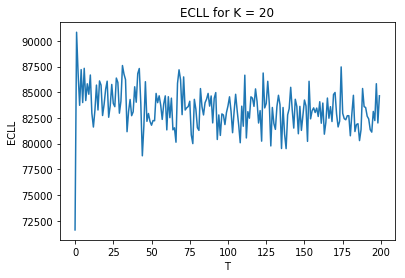

In [10]:
plt.plot(range(T), cll)
plt.title("ECLL for K = %i"%K)
plt.xlabel("T")
plt.ylabel("ECLL")
plt.show()

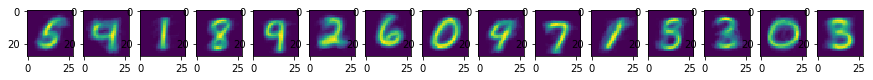

In [34]:
plt.figure(figsize = (K,K))
for k in range(K):
    plt.subplot(K, K, k+1)
    plt.imshow(np.reshape(mu[k], [28,28]))
plt.show()

In [35]:
for k in range(K):
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(mu[k], [28,28]))
    plt.savefig("KO_" + str(K) + str(k) + ".png")
    plt.close()